In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [3]:
data.corr(numeric_only=True) #corrolation between numeric columns

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [4]:
data['Date'] = pd.to_datetime(data['Date']) #converting type of 'Date' column from str to time&date
data.set_index('Date', inplace=True) #The set_index() method allows one or more column values become the row index.

In [5]:
data.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [6]:
data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
data = data.dropna()
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


<Axes: xlabel='Date'>

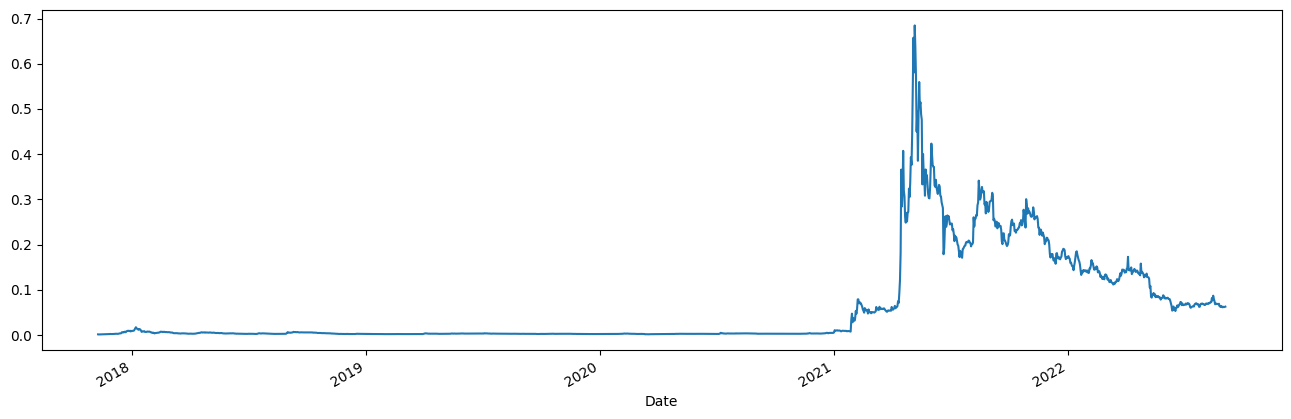

In [9]:
data['Close'].plot(figsize=(16,5))

In [12]:
df2 = data.tail(100)
train = df2[:40]
test = df2[40:]
  
print(train.shape, test.shape)

(40, 6) (60, 6)


In [13]:
from pmdarima import auto_arima
auto_arima(train['Close'], m=7, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=-309.189, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-317.137, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-314.443, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-315.283, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-318.806, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-315.752, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-316.515, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-315.806, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-315.731, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-315.599, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-314.083, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 1.548 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    ["Close", "Adj Close"], axis=1), order=(0,0,1), seasonal_order=(2,0,0,7))
results = model.fit()
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.19864D+00    |proj g|=  1.72872D+18

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     21      1     0     0   1.729D+18  -5.199D+00
  F =  -5.1986368975814141     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                   40
Model:      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

In [15]:
start = 40
end = 99
predictions = results.predict(
    start=start,
    end=end,
    exog=test.drop(["Close","Adj Close"], axis=1))
predictions

2022-07-06    0.068012
2022-07-07    0.069771
2022-07-08    0.071132
2022-07-09    0.069354
2022-07-10    0.067544
2022-07-11    0.063929
2022-07-12    0.061962
2022-07-13    0.060329
2022-07-14    0.060257
2022-07-15    0.063218
2022-07-16    0.063930
2022-07-17    0.063984
2022-07-18    0.067422
2022-07-19    0.067489
2022-07-20    0.074109
2022-07-21    0.068327
2022-07-22    0.068648
2022-07-23    0.067943
2022-07-24    0.067964
2022-07-25    0.063640
2022-07-26    0.060425
2022-07-27    0.065987
2022-07-28    0.068637
2022-07-29    0.069767
2022-07-30    0.072105
2022-07-31    0.070343
2022-08-01    0.069623
2022-08-02    0.066699
2022-08-03    0.067342
2022-08-04    0.067045
2022-08-05    0.069753
2022-08-06    0.070018
2022-08-07    0.069225
2022-08-08    0.071573
2022-08-09    0.071946
2022-08-10    0.069641
2022-08-11    0.073493
2022-08-12    0.071569
2022-08-13    0.074025
2022-08-14    0.081027
2022-08-15    0.075809
2022-08-16    0.084418
2022-08-17    0.081602
2022-08-18 

<Axes: xlabel='Date'>

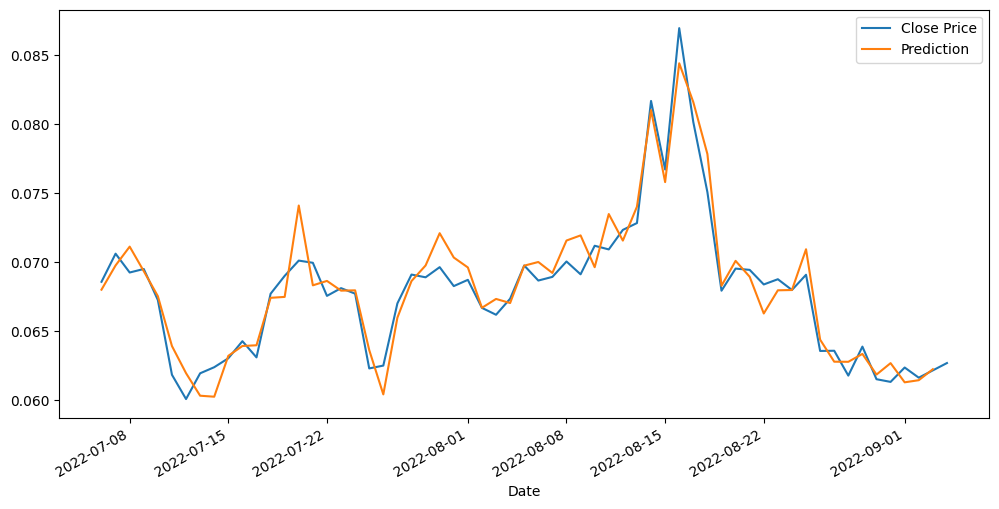

In [16]:
test["Close"].plot(label="Close Price",legend=True, figsize=(12, 6))
predictions.plot(label='Prediction', legend=True)


In [33]:
from sklearn.metrics import mean_squared_error
print(f"cost of prediction1: {mean_squared_error(test['Close'], predictions)}")
print(f"cost of baseline: {mean_squared_error(test['Close'], [test['Close'].mean()]*len(test['Close']))}")

cost of prediction1: 1.9889638168826955e-06
cost of baseline: 2.5098154047499995e-05


Here I want to define more parameter and add the ones with highest correlation to "exog".

Let's see what happen!

In [24]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

In [26]:
data = data.drop(['z', 'y'], axis=1) 
data.head()

,Open,High,Low,Close,Adj Close,Volume,gap,a,b
Date,,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [28]:
df3 = data.tail(100)
train2 = df3[:40]
test2 = df3[40:]
  
print(train.shape, test.shape)

(40, 6) (60, 6)


In [29]:
auto_arima(train['Close'], m=7, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=-309.189, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-317.137, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-314.443, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-315.283, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-318.806, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-315.752, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-316.515, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-315.806, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=-315.731, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-315.599, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=-314.083, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 0.603 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [30]:
model2 = SARIMAX(endog=train2["Close"], exog=train2.drop(
    ["Close", "Adj Close"], axis=1), order=(0,0,1), seasonal_order=(2,0,0,7))
results2 = model2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.34766D+00    |proj g|=  3.21923D+18

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      1     21      1     0     0   3.219D+18  -5.348D+00
  F =  -5.3476582588712400     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding erro

In [31]:
predictions2 = results2.predict(
    start=start,
    end=end,
    exog=test2.drop(["Close","Adj Close"], axis=1))
predictions2

2022-07-06    0.068389
2022-07-07    0.070163
2022-07-08    0.071282
2022-07-09    0.069442
2022-07-10    0.066979
2022-07-11    0.063156
2022-07-12    0.061458
2022-07-13    0.060488
2022-07-14    0.060293
2022-07-15    0.063419
2022-07-16    0.063699
2022-07-17    0.063943
2022-07-18    0.067987
2022-07-19    0.067923
2022-07-20    0.073135
2022-07-21    0.068381
2022-07-22    0.068686
2022-07-23    0.068128
2022-07-24    0.068263
2022-07-25    0.063518
2022-07-26    0.060711
2022-07-27    0.066247
2022-07-28    0.068949
2022-07-29    0.070214
2022-07-30    0.072354
2022-07-31    0.070512
2022-08-01    0.069701
2022-08-02    0.066512
2022-08-03    0.067222
2022-08-04    0.066999
2022-08-05    0.069864
2022-08-06    0.069924
2022-08-07    0.068961
2022-08-08    0.071830
2022-08-09    0.072041
2022-08-10    0.069746
2022-08-11    0.073882
2022-08-12    0.071625
2022-08-13    0.074369
2022-08-14    0.076545
2022-08-15    0.075025
2022-08-16    0.076334
2022-08-17    0.079488
2022-08-18 

<Axes: xlabel='Date'>

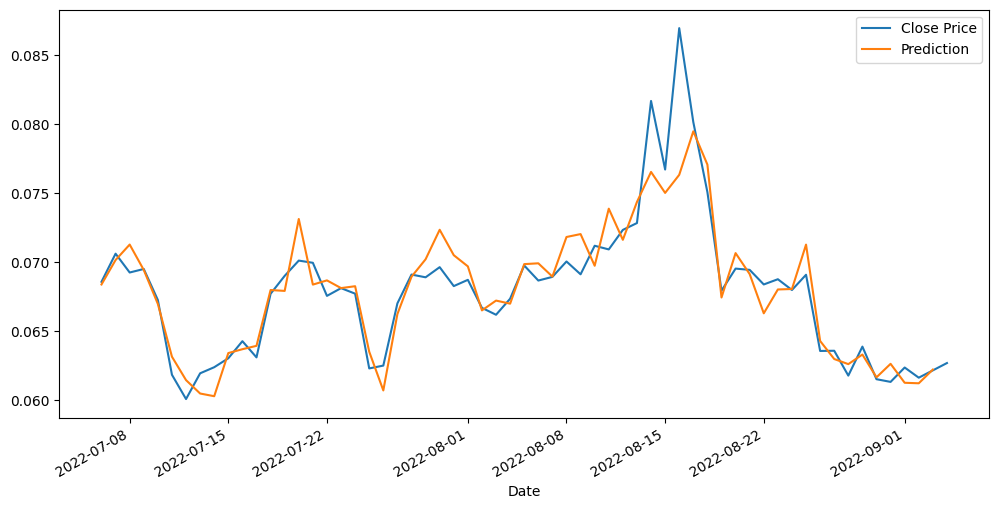

In [32]:
test2["Close"].plot(label="Close Price",legend=True, figsize=(12, 6))
predictions2.plot(label='Prediction', legend=True)

The cost increased because the new parameters that were defined had low correlation with "Close" parameter.

In [34]:
print(f"cost of prediction1: {mean_squared_error(test['Close'], predictions)}")
print(f"cost of prediction2: {mean_squared_error(test2['Close'], predictions2)}")


cost of prediction1: 1.9889638168826955e-06
cost of prediction2: 4.032034171118123e-06
